# Описание проекта

В данном проекте нам предстоит решить где бурить скаважину в интересах добывающей компании.\
Имеется 3 дата-сета, содержащих необходимые сведения по каждому из 3-х регионов.\
Необходимо построить модель, которая определит потенциальные прибыль и риски для каждого из 3-х регионов.\
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.\
Для данной задачи подходит только модель Логистической регресии.\
Данные содержат столбец с идентификатором, 3 столбца с признаками и стобец с целевым признаком (всего 5 столбцов) и по 10000 строк в каждом дата-сете\
Примерный ход выполнения работы:
- Загрузим и подготовим данные
- Обучим и проверим модель для каждого региона
- Рассчитаем прибыль
- Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
- Посчитаем риски и прибыль для каждого региона

# Импортируем необходимые библиотеки

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#constants
COUNT = 200
MONEY = 10**10
REVENUE = 45*(10**4)
N = 500
STATE = np.random.RandomState(12345)

# Пользовательские функции.
В этом проекте будет использовано несколько собственных функций для автоматизации повторяющихся действий

In [3]:
# Функция для первичного анализа дата-сета
def analyze_df(df):
    # выводим размерность датафрейма
    display("Размерность датафрейма:")
    display(df.shape)
    display("")

    # выводим информацию о датафрейме
    display("Информация о датафрейме:")
    display(df.info())
    display("")

    # выводим статистическую информацию о датафрейме
    display("Статистическая информация о датафрейме:")
    display(df.describe())
    display("")

    # выводим первые 10 строк датафрейма
    display("Первые 10 строк датафрейма:")
    display(df.head(10))

    # выводим матрицу корреляции
    display("Матрица корреляции:")
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, cmap='coolwarm', linecolor='none', annot=True)

In [4]:
# Функция для отрисовки гистограммы, и Boxplot
def plot_df(df):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1) 
    plt.title('Boxplot')  
    plt.ylabel('Value')
    plt.boxplot (x = df['product'])
    plt.subplot(1, 2, 2)
    plt.title('Гистограмма распределения объёма')
    plt.xlabel('Объём')
    plt.ylabel('Количество')
    plt.hist(x = df['product'], bins=35, range = (0, 200))
    plt.show()

In [5]:
def split_and_train(df):
 
    features = df.drop(['product', 'id'], axis=1)
    target = df["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=STATE)
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lr = LinearRegression(normalize=False)
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    
    print("RMSE: {0:.2f}".format(rmse))
    print("Average product: {0:.2f}".format(average_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse, average_product)

# Загрузим необходимые дата-сеты

In [6]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')

except:
    df_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

# Изучим основные хар-ки дата-сетов

'Размерность датафрейма:'

(100000, 5)

''

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

''

'Статистическая информация о датафрейме:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


''

'Первые 10 строк датафрейма:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


'Матрица корреляции:'

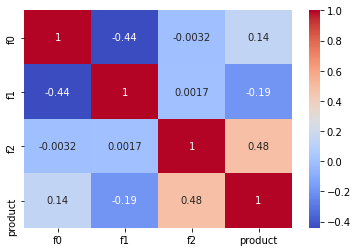

In [7]:
analyze_df(df_0)

'Размерность датафрейма:'

(100000, 5)

''

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

''

'Статистическая информация о датафрейме:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


''

'Первые 10 строк датафрейма:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


'Матрица корреляции:'

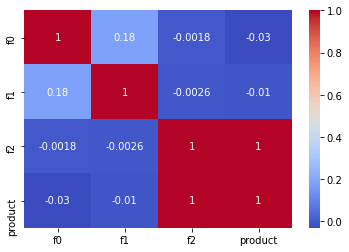

In [8]:
analyze_df(df_1)

'Размерность датафрейма:'

(100000, 5)

''

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

''

'Статистическая информация о датафрейме:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


''

'Первые 10 строк датафрейма:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


'Матрица корреляции:'

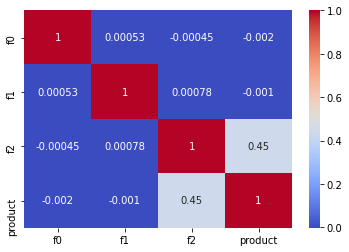

In [9]:
analyze_df(df_2)

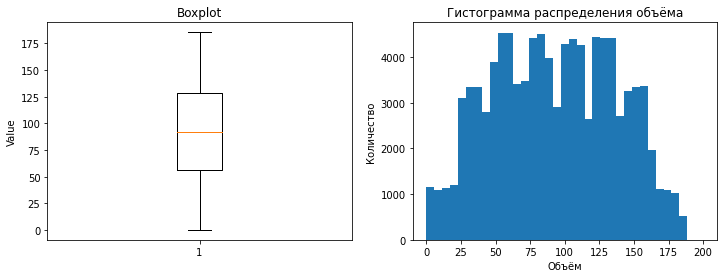

In [10]:
plot_df(df_0)

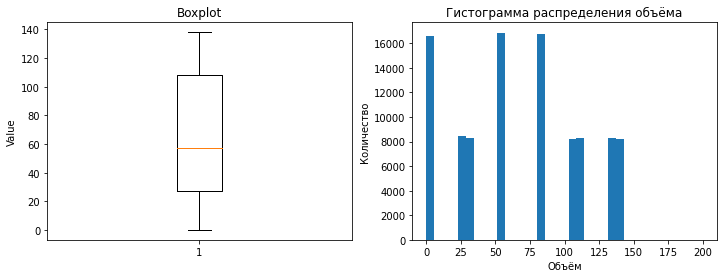

In [11]:
plot_df(df_1)

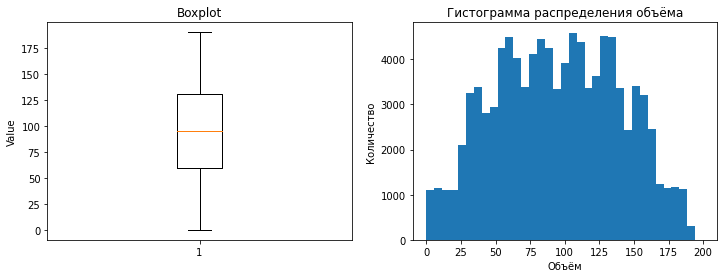

In [12]:
plot_df(df_2)

# Выводы о составе датасетов.
Каждый из 3-х датасетов содержит 5 столбцов и 10 000 значений.
Пропусков и аномалий нет.\
Предобработка данных не понадобится.\
Судя по гистограммам, распределение не идельное, но приемлимое.\
Недопустимо больших значений корреляции не наблюдаем.\
Из графика распределения объёма по второй таблице видно, что много пустых скважин и много заполненных скважин, в сумме с более низким, чем в остальных случаях распределением объема, рисует довольно интересную картину.


# Обучение и проверка модели

In [13]:
predictions_0, target_0, rmse_0, avg_0 = split_and_train(df_0)
predictions_1, target_1, rmse_1, avg_1 = split_and_train(df_1)
predictions_2, target_2, rmse_2, avg_2 = split_and_train(df_2)

RMSE: 37.58
Average product: 92.59
RMSE: 0.89
Average product: 68.77
RMSE: 39.96
Average product: 95.09


In [14]:
split_and_train(df_0)

RMSE: 37.58
Average product: 92.66


(0        112.958982
 1         68.877696
 2        127.801985
 3        142.532485
 4        105.733497
             ...    
 24995     61.956631
 24996    109.882884
 24997    110.876772
 24998     57.693018
 24999     85.462470
 Length: 25000, dtype: float64,
 0        129.546681
 1         50.873862
 2        184.695665
 3        176.587720
 4         51.054946
             ...    
 24995     39.431554
 24996    181.399284
 24997    122.817025
 24998    103.835162
 24999     29.021421
 Name: product, Length: 25000, dtype: float64,
 37.57951548534859,
 92.66386568661606)

In [15]:
split_and_train(df_1)

RMSE: 0.89
Average product: 69.22


(0         29.117188
 1         81.337208
 2         83.587069
 3        111.283568
 4        111.627559
             ...    
 24995     55.872151
 24996     81.691397
 24997     81.608170
 24998    135.144257
 24999      3.541762
 Length: 25000, dtype: float64,
 0         30.132364
 1         80.859783
 2         84.038886
 3        110.992147
 4        110.992147
             ...    
 24995     53.906522
 24996     80.859783
 24997     80.859783
 24998    134.766305
 24999      3.179103
 Name: product, Length: 25000, dtype: float64,
 0.8904163214946189,
 69.22345150014002)

In [16]:
split_and_train(df_2)

RMSE: 40.03
Average product: 95.05


(0         78.982209
 1         81.886679
 2         73.981274
 3        120.919108
 4         67.622778
             ...    
 24995     97.545332
 24996    113.845259
 24997    120.308259
 24998     55.882968
 24999     99.355010
 Length: 25000, dtype: float64,
 0        175.869899
 1         55.009026
 2         51.119151
 3        162.193917
 4         50.046784
             ...    
 24995     33.017737
 24996    170.227089
 24997    154.830621
 24998     33.786606
 24999    134.730975
 Name: product, Length: 25000, dtype: float64,
 40.02938636981283,
 95.04953599535948)

# Вывод о запасах продукта и ошибок модели по регионам

Предварительный вывод после анализа дата-сетов подтвердился.\
Во втором месторождении (df_1) запасов продукта значительно меньше, чем в остальных. 68.82 против , приблизительно 93.00.\
Но и средняя квадратичная ошибка модели в этом случае значительно меньше 0.89 против, приблизительно 39.00.\
Переходим к расчету прибыли и рисков.

# Подготовка к расчёту прибыли

In [17]:
volume_needed = MONEY/COUNT/REVENUE
print('Достаточный объём для безубыточной разработки новой скважины:', volume_needed)

Достаточный объём для безубыточной разработки новой скважины: 111.11111111111111


Как видим, средний объем запасов меньше точки безубыточности.\
Соответственно, при нынешней себестоимости разработка всех 3-х месторождений не имеет смысла.\
На этом исследование можно было бы закончить, но мы идем дальше

# Расчёт прибыли и рисков

In [18]:
#функция для расчёта прибыли по выбранным скважинам и предсказаниям модели
def revenue(target, probabilities, COUNT):
    # Выберите скважины с максимальными значениями предсказаний.
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:COUNT]
    return REVENUE * selected.sum() - MONEY

In [19]:
def risk(target, y_pred, df):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(y_pred).reset_index(drop=True)
    values = []
    for j in range(1000):
        target_subsample = target.sample(n = N, replace = True, random_state = STATE)
        probs_subsample = y_pred.loc[target_subsample.index]

        values.append(revenue(target_subsample, probs_subsample, COUNT))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = values.loc[values < 0].count() / values.count()*100
    mean = values.mean()
    print("Средняя выручка:", round(mean/10**6, 2), 'млн.руб')
    print("Доверительный интервал от:", round(lower/10**6, 2),'млн.руб.', 'до:', round(upper/10**6, 2),'млн.руб')
    print("Риск:", round(risk, 2), '%')

In [20]:
predictions_0, target_0, rmse_0, avg_0 = split_and_train(df_0)
risk(target_0, predictions_0, df_0)

RMSE: 37.72
Average product: 92.48
Средняя выручка: 473.57 млн.руб
Доверительный интервал от: -84.2 млн.руб. до: 980.81 млн.руб
Риск: 4.7 %


In [21]:
predictions_1, target_1, rmse_1, avg_1 = split_and_train(df_1)
risk(target_1, predictions_1, df_1)

RMSE: 0.89
Average product: 68.32
Средняя выручка: 440.23 млн.руб
Доверительный интервал от: 2.54 млн.руб. до: 873.11 млн.руб
Риск: 2.3 %


In [22]:
predictions_2, target_2, rmse_2, avg_2 = split_and_train(df_2)
risk(target_2, predictions_2, df_2)

RMSE: 39.84
Average product: 95.09
Средняя выручка: 386.03 млн.руб
Доверительный интервал от: -161.04 млн.руб. до: 926.2 млн.руб
Риск: 8.4 %


# Вывод
Опираясь на среднюю выручку, имеет смысл разрабатывать 1 регион (df_0).\
Однако, если опираться на риски, то 2 регион (df_1)\
Учитывая такую неопределенность, стоит отметить, что основным показателем для определения целесообразности добычи для нас служит именно риск! Он должен быть меньше 2,5%.\
Отдельно отметим, что 95% доверительный интервал лежит в области положительных значений только во 2 регионе (df_1).
В 2-х остальных часть интервала - отрицательна.\
Резюмируя 2 вышеизложенных факта можно рассматривать добычу только во 2 регионе (df_1)\
При этом стоит учитывать, что все месторождения, согласно нашему предыдущему выводу - убыточны.\
P.S.Проект выполнял локально ( не в юпитере)